Fuente:    
https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

Problema:
    
    Se tiene un conjunto de 768 datos de pacientes mujeres con diabetes. Los datos incluyen ciertas mediciones numéricas de la condición de los pacientes, tales como:
    
   + edad
   + número de veces que estuvo embarazada
   + presion sanguinea
   + concentración de glucosa en sangre
   + tension en la piel
   + índice de masa corporal
   + determinación independiente de la presencia de la enfermedad 
    
La ultima columna vale 0, 1:

+ 0: no desarrollo la enfermedad
+ 1: si desarrollo la enfermedad]
    
Se puede estimar a partir de esta muestra cuál es la probabilidad de que una persona con (sin) diabetes tenga ciertos valores de los indicadores.

Ahora, si medimos los indicadores, **¿cuál es la probabilidad de que tenga diabetes?**

In [1]:
import csv
import random
import math
from matplotlib import pyplot as plt
import numpy as np

## Funciones

In [12]:
# Lector de archivos CSV
def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

# Construir la particion de la muestra en una parte de entrenamiento y una de control
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

In [3]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [4]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [28]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.iteritems():
        summaries[classValue] = summarize(instances)
    return summaries

In [6]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.iteritems():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.iteritems():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

# Ahora corremos el algoritmo completo de Naive Bayes

#### La funcion splitDataset sirve para separar la muestra en dos partes, una de entrenamiento y una de validacion

In [14]:
# Leer el archivo
dataset = loadCsv('./data/pima-indians-diabetes.csv')
# Separar la muestra en dos partes:
splitRatio = 0.4
trainingSet, testSet = splitDataset(dataset, splitRatio)

## Visualizar los datos

In [15]:
len(dataset[0])

9

In [17]:
import csv
D = csv.reader('./data/pima-indians-diabetes.csv')

In [19]:
import pandas
column_names = ['npreg','glucoseConc','dbp','tt','si','bmi','dpf','age','class']
D = pandas.read_csv('./data/pima-indians-diabetes.csv', header = None, names = column_names)

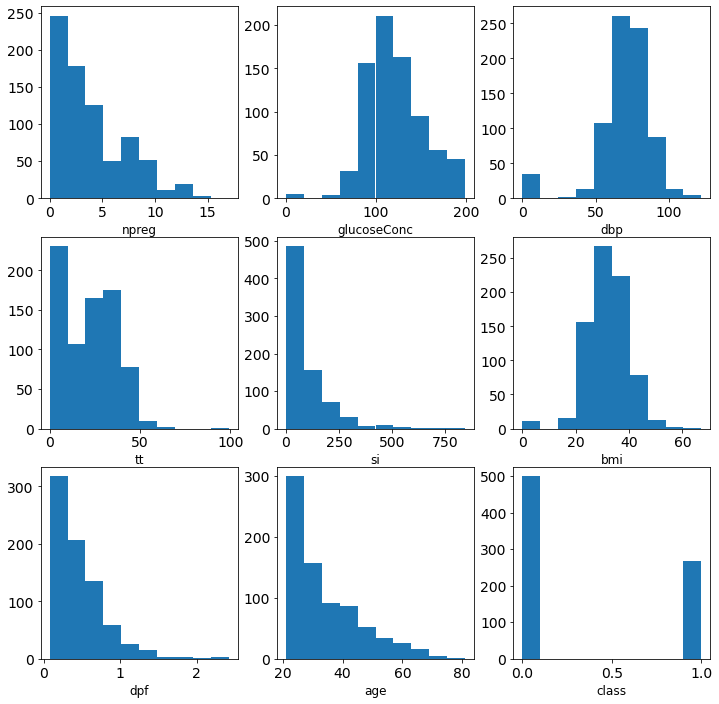

In [20]:
f, xarr = plt.subplots(3, 3)
f.set_figheight(12)
f.set_figwidth(12)

xarr[0,0].hist(D['npreg'])
xarr[0,0].set_xlabel('npreg')

xarr[0,1].hist(D['glucoseConc'])
xarr[0,1].set_xlabel('glucoseConc')

xarr[0,2].hist(D['dbp'])
xarr[0,2].set_xlabel('dbp')

xarr[1,0].hist(D['tt'])
xarr[1,0].set_xlabel('tt')

xarr[1,1].hist(D['si'])
xarr[1,1].set_xlabel('si')

xarr[1,2].hist(D['bmi'])
xarr[1,2].set_xlabel('bmi')

xarr[2,0].hist(D['dpf'])
xarr[2,0].set_xlabel('dpf')

xarr[2,1].hist(D['age'])
xarr[2,1].set_xlabel('age')

xarr[2,2].hist(D['class'])
xarr[2,2].set_xlabel('class')

plt.show()

### Veamos ahora si hay diferencias entre las dos clases

In [21]:
filter = D['class']==0
D1 = D[filter]
D2 = D[-filter]

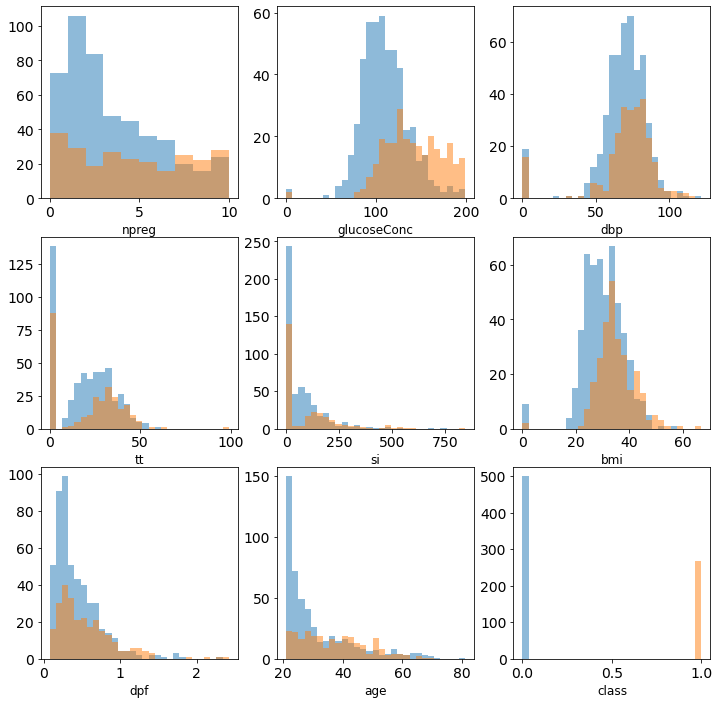

In [22]:
f, xarr = plt.subplots(3, 3)
f.set_figheight(12)
f.set_figwidth(12)
nbins = 30

a = column_names[0]
X = D1[a]
Y = D2[a]
Z = D[a]
bins = np.linspace(0, 10, 11)
xarr[0,0].hist(X, bins, alpha=0.5)
xarr[0,0].hist(Y, bins, alpha=0.5)
xarr[0,0].set_xlabel(a)

a = column_names[1]
X = D1[a]
Y = D2[a]
Z = D[a]
bins = np.linspace(min(Z), max(Z), nbins)
xarr[0,1].hist(X, bins, alpha=0.5)
xarr[0,1].hist(Y, bins, alpha=0.5)
xarr[0,1].set_xlabel(a)

a = column_names[2]
X = D1[a]
Y = D2[a]
Z = D[a]
bins = np.linspace(min(Z), max(Z), nbins)
xarr[0,2].hist(X, bins, alpha=0.5)
xarr[0,2].hist(Y, bins, alpha=0.5)
xarr[0,2].set_xlabel(a)

a = column_names[3]
X = D1[a]
Y = D2[a]
Z = D[a]
bins = np.linspace(min(Z), max(Z), nbins)
xarr[1,0].hist(X, bins, alpha=0.5)
xarr[1,0].hist(Y, bins, alpha=0.5)
xarr[1,0].set_xlabel(a)

a = column_names[4]
X = D1[a]
Y = D2[a]
Z = D[a]
bins = np.linspace(min(Z), max(Z), nbins)
xarr[1,1].hist(X, bins, alpha=0.5)
xarr[1,1].hist(Y, bins, alpha=0.5)
xarr[1,1].set_xlabel(a)

a = column_names[5]
X = D1[a]
Y = D2[a]
Z = D[a]
bins = np.linspace(min(Z), max(Z), nbins)
xarr[1,2].hist(X, bins, alpha=0.5)
xarr[1,2].hist(Y, bins, alpha=0.5)
xarr[1,2].set_xlabel(a)

a = column_names[6]
X = D1[a]
Y = D2[a]
Z = D[a]
bins = np.linspace(min(Z), max(Z), nbins)
xarr[2,0].hist(X, bins, alpha=0.5)
xarr[2,0].hist(Y, bins, alpha=0.5)
xarr[2,0].set_xlabel(a)

a = column_names[7]
X = D1[a]
Y = D2[a]
Z = D[a]
bins = np.linspace(min(Z), max(Z), nbins)
xarr[2,1].hist(X, bins, alpha=0.5)
xarr[2,1].hist(Y, bins, alpha=0.5)
xarr[2,1].set_xlabel(a)

a = column_names[8]
X = D1[a]
Y = D2[a]
Z = D[a]
bins = np.linspace(min(Z), max(Z), nbins)
xarr[2,2].hist(X, bins, alpha=0.5)
xarr[2,2].hist(Y, bins, alpha=0.5)
xarr[2,2].set_xlabel(a)

plt.show()

In [13]:
# separamos a todos los datos segun su clase
separated = separateByClass(dataset)

In [ ]:
print('Separamos la muestra origial de {0} instancias en {1} de entrenamiento y {2} de validacion.').format(len(dataset), len(trainingSet), len(testSet))

### Ahora calculamos los estimadores de la media y la varianza para cada uno de los atributos

In [24]:
summaries = summarizeByClass(trainingSet)

AttributeError: 'dict' object has no attribute 'iteritems'

In [25]:
summarizeByClass?

Signature: summarizeByClass(dataset)
Docstring: <no docstring>
File:      /tmp/ipykernel_54742/2122014299.py
Type:      function


In [16]:
summaries[0]

[(3.122448979591837, 2.761513171683881),
 (109.81122448979592, 25.228190917195665),
 (67.53571428571429, 19.107892046521993),
 (20.107142857142858, 14.52861897190402),
 (66.79591836734694, 94.28091784891754),
 (30.178571428571427, 7.943237730360686),
 (0.42236734693877526, 0.31252442407955666),
 (31.790816326530614, 12.887366795429436)]

In [26]:
predictions = getPredictions(summaries, testSet)

NameError: name 'summaries' is not defined

In [19]:
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: {0}%').format(accuracy)

Accuracy: 73.1019522777%
